In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Zadanie 1
Dane są dwa sygnały o okresie podstawowym N=4: s1 = {2, 1, 3, 0} i s2 = {0, 1, 3, 0}


In [2]:
period = 4
s1 = [2, 1, 3, 0]
s2 = [0, 1, 3, 0]

#### a) Dla każdego z sygnału:
- wyznaczyć i wykreślić widmo amplitudowe i fazowe

In [3]:
def calc_spectrum(signal):
    return np.fft.fft(signal)

def calc_amplitude_spectrum(signal):
    return np.abs(calc_spectrum(signal))

def calc_phase_spectrum(signal):
    return np.angle(calc_spectrum(signal))

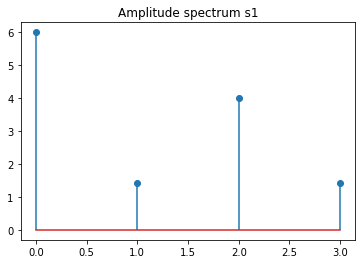

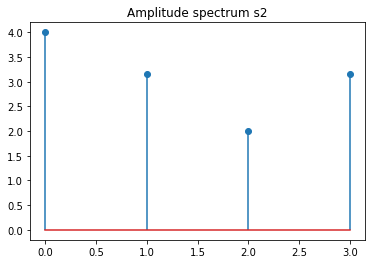

In [4]:
plt.stem(calc_amplitude_spectrum(s1))
plt.title("Amplitude spectrum s1")
plt.show()

plt.stem(calc_amplitude_spectrum(s2))
plt.title("Amplitude spectrum s2")
plt.show()

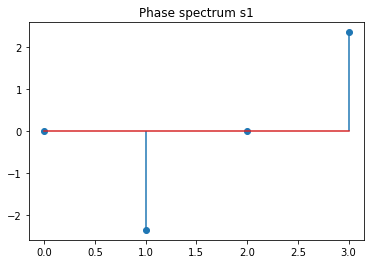

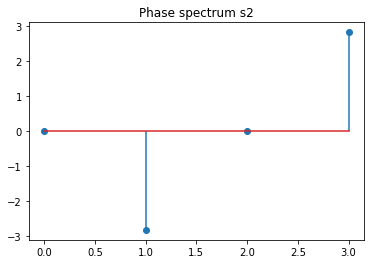

In [5]:
plt.stem(calc_phase_spectrum(s1))
plt.title("Phase spectrum s1")
plt.show()

plt.stem(calc_phase_spectrum(s2))
plt.title("Phase spectrum s2")
plt.show()

- obliczyć moc sygnału

In [6]:
def calc_power(signal):
    return sum([a**2 for a in signal]) / len(signal)

In [7]:
print("Power_s1 = ", calc_power(s1))
print("Power_s2 = ", calc_power(s2))

Power_s1 =  3.5
Power_s2 =  2.5


- sprawdzić słuszność twierdzenia Parsevala

In [15]:
def calc_parseval(signal):
    return sum([np.abs(a)**2 for a in calc_spectrum(signal)])  / len(signal)

def check_parseval_theorem(signal):
    return calc_power(signal) * len(signal) == calc_parseval(signal)

In [16]:
print("Parseval_power_s1 = ", calc_parseval(s1))
print("Parseval_power_s2 = ", calc_parseval(s2))
print(f"Twierdzenie Parsevala dla s1 {'jest' if check_parseval_theorem(s1) else 'nie jest'} prawdziwe")
print(f"Twierdzenie Parsevala dla s2 {'jest' if check_parseval_theorem(s2) else 'nie jest'} prawdziwe")

Parseval_power_s1 =  14.0
Parseval_power_s2 =  10.0
Twierdzenie Parsevala dla s1 jest prawdziwe
Twierdzenie Parsevala dla s2 jest prawdziwe


#### b) Sprawdzić słuszność twierdzenia o dyskretnej transformacji Fouriera splotu kołowego sygnałów s1 i s2:
- wyznaczyć ręcznie splot kołowy sygnałów s1 i s2
- wyznaczyć splot za pomocą dyskretnej transformacji Fouriera

In [11]:
def calc_circular_convolution(signal1, signal2):
    convolution = []
    for i1, _ in enumerate(signal1):
        convolution.append(sum([signal1[i2]*signal2[i1-i2] for i2, _ in enumerate(signal1)]))
    return convolution

def calc_circular_convolution_fft(signal1, signal2):
    return np.fft.ifft(np.fft.fft(signal1) * np.fft.fft(signal2))

In [12]:
convolution = calc_circular_convolution(s1, s2)
convolution_fft = calc_circular_convolution_fft(s1, s2)
print("Splot wyznaczony ręcznie: ", convolution)
print("Splot wyznaczony za pomocą DTF: ", convolution_fft)

Splot wyznaczony ręcznie:  [9, 2, 7, 6]
Splot wyznaczony za pomocą DTF:  [9.+0.j 2.+0.j 7.+0.j 6.+0.j]


Wyniki są takie same, więc twierdzenie o dyskretnej transformacji Fouriera jest prawdziwe

### Zadanie 2
Zbadać wpływ przesunięcia w czasie na postać widma amplitudowego i widma fazowego dyskretnego sygnału harmonicznego `s[n] = A*cos(2*pi*n/N)` o amplitudzie 3 i okresie podstawowym 76. W tym celu dla każdej wartości [0, N/4, N/2, 3N/4] wykreślić widmo amplitudowe i fazowe przesuniętego sygnału s[n-n0].

In [17]:
A = 3
N = 76
N_list = [0, N//4, N//2, 3*N//4]

signal = [A * np.cos(2*np.pi*n/N) for n in range(N)]

In [18]:
def shift_signal(signal, index):
    return signal[index:] + signal[:index]

In [19]:
def calc_spectrums(signal, shift_index):
    shifted_signal = shift_signal(signal, shift_index)
    amplitude_spectrum = calc_amplitude_spectrum(shifted_signal)
    phase_spectrum = calc_phase_spectrum(shifted_signal)
    phase_spectrum = [phase_spectrum[i] if np.abs(n) > 1e-6 else 0 for i, n in enumerate(amplitude_spectrum)]
    return amplitude_spectrum, phase_spectrum


Przesunięcie o 0:

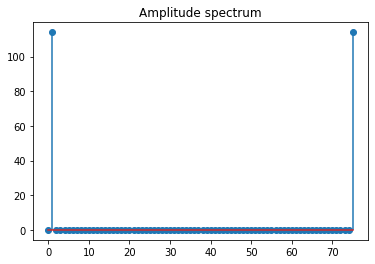

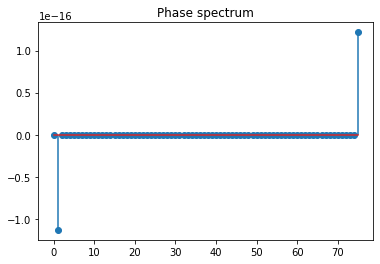

In [20]:
amplitude_spectrum, phase_spectrum = calc_spectrums(signal, N_list[0])
plt.stem(amplitude_spectrum)
plt.title("Amplitude spectrum")
plt.show()

plt.stem(phase_spectrum)
plt.title("Phase spectrum")
plt.show()

Przesunięcie o N/4:

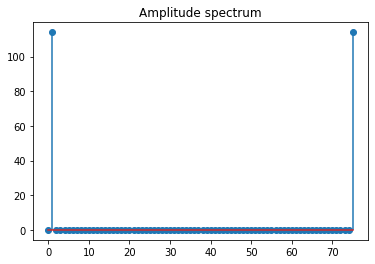

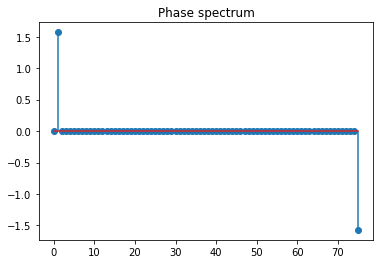

In [21]:
amplitude_spectrum, phase_spectrum = calc_spectrums(signal, N_list[1])
plt.stem(amplitude_spectrum)
plt.title("Amplitude spectrum")
plt.show()

plt.stem(phase_spectrum)
plt.title("Phase spectrum")
plt.show()

Przesunięcie o N/2:

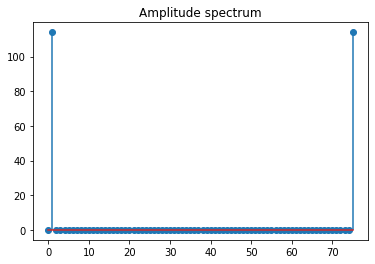

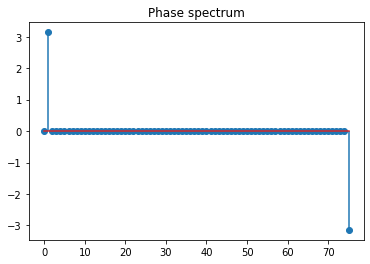

In [22]:
amplitude_spectrum, phase_spectrum = calc_spectrums(signal, N_list[2])
plt.stem(amplitude_spectrum)
plt.title("Amplitude spectrum")
plt.show()

plt.stem(phase_spectrum)
plt.title("Phase spectrum")
plt.show()

Przesunięcie o 3N/4:

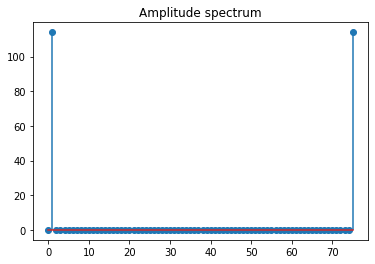

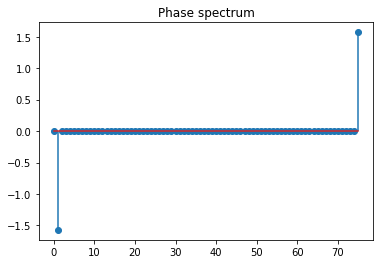

In [23]:
amplitude_spectrum, phase_spectrum = calc_spectrums(signal, N_list[3])
plt.stem(amplitude_spectrum)
plt.title("Amplitude spectrum")
plt.show()

plt.stem(phase_spectrum)
plt.title("Phase spectrum")
plt.show()

#### Wnioski:
Zgodnie z własnością DTF o przesunięciu w dziedzinie czasu `n[n-n0]←DTF→X[k]*exp(-jk*2pi*n0/N)` zachodzi następujące:

Przesunięcie w dzieedzinie czasu nie powoduje zmiany widma amplitudowego.

Przesunięcie w dziedzinie czasu wpływa na widmo fazowe w następujący sposób:
```
n0 = 0:
e^0 = 1

n0 = N/4:
e^(-j*k*pi/2)

n0 = N/2:
e^(-j*k*pi)

n0 = 3N/4:
e^(-j*k*3pi/2)
```

### Zadanie 3
Zbadać wpływ dopełnienia zerami na postać widma amplitudowego i widma fazowego dyskretnego sygnału `s[n] = A * n%N/N` o amplitudzie 1 i okresie podstatowym 17. W tym celu dla każdej wartości [0, 1N, 4N, 9N] wykreślić widmo amplitudowe i fazowe sygnały s[n] dopełnionego N0 zerami.

In [24]:
A = 1
N = 17
N_list = [0, 1*N, 4*N, 9*N]
signal = [A * (n%N)/N for n in range(N)]

In [25]:
def expand_zeros(signal, n_zeros):
    return signal + [0.0] * n_zeros

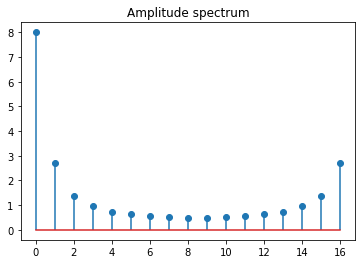

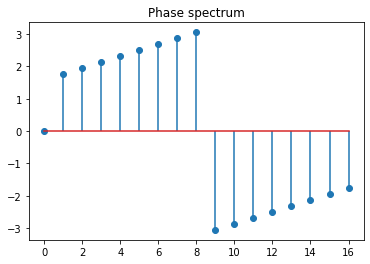

In [26]:
signal_expanded = expand_zeros(signal, N_list[0])
amplitude_spectrum = calc_amplitude_spectrum(signal_expanded)
phase_spectrum = calc_phase_spectrum(signal_expanded)
plt.stem(amplitude_spectrum)
plt.title("Amplitude spectrum")
plt.show()

plt.stem(phase_spectrum)
plt.title("Phase spectrum")
plt.show()

Dopełnienie N zerami:

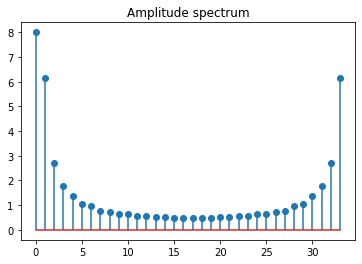

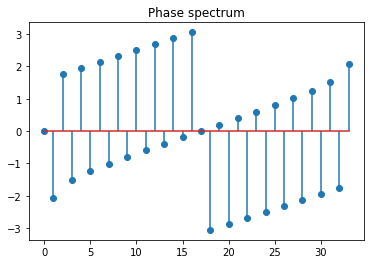

In [27]:
signal_expanded = expand_zeros(signal, N_list[1])
amplitude_spectrum = calc_amplitude_spectrum(signal_expanded)
phase_spectrum = calc_phase_spectrum(signal_expanded)
plt.stem(amplitude_spectrum)
plt.title("Amplitude spectrum")
plt.show()

plt.stem(phase_spectrum)
plt.title("Phase spectrum")
plt.show()

Dopełnienie 4N zerami:

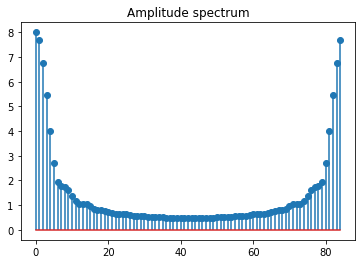

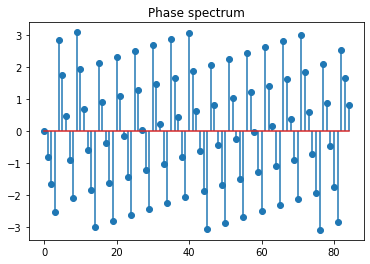

In [28]:
signal_expanded = expand_zeros(signal, N_list[2])
amplitude_spectrum = calc_amplitude_spectrum(signal_expanded)
phase_spectrum = calc_phase_spectrum(signal_expanded)
plt.stem(amplitude_spectrum)
plt.title("Amplitude spectrum")
plt.show()

plt.stem(phase_spectrum)
plt.title("Phase spectrum")
plt.show()

Dopełnienie 9N zerami:

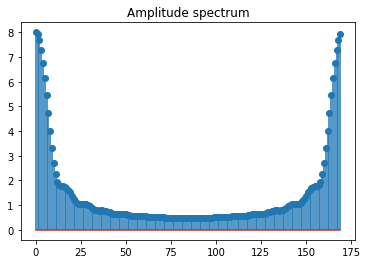

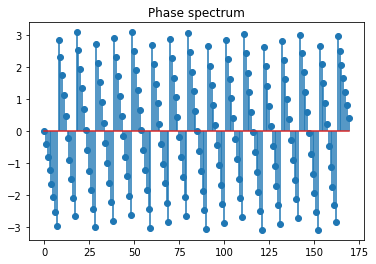

In [29]:
signal_expanded = expand_zeros(signal, N_list[3])
amplitude_spectrum = calc_amplitude_spectrum(signal_expanded)
phase_spectrum = calc_phase_spectrum(signal_expanded)
plt.stem(amplitude_spectrum)
plt.title("Amplitude spectrum")
plt.show()

plt.stem(phase_spectrum)
plt.title("Phase spectrum")
plt.show()

#### Wnioski:

Dopełniając sygnał zerami dostajemy więcej punktów, w których obliczane jest widmo, tym niemniej nie zwiększa to ilość otrzymywanej informacji.

### Zadanie 4
Dany jest sygnał rzeczywisty `s[t] = A1*sin(2*pi*f1*t) + A2*sin(2*pi*f2*t) + A3*sin(2*pi*f3*t)`, gdzie `A1 = 0.2`, `f1 = 2000 Hz`, `A2 = 0.5`, `f2 = 6000 Hz`, `A3 = 0.6`, `f3 = 10000 Hz`. Przy założeniu, że częstotliwość próbkowania wynosi `fs = 48000 Hz`, a liczba próbek sygnału winosi `N1 = 2048`, przedstawić wykres widmowej gęstości mocy sygnału s(t).

In [21]:
A1 = 0.2
f1 = 2000

A2 = 0.4
f2 = 6000

A3 = 0.6
f3 = 10000

fs = 48000

N1 = 2048

def signal_function(t):
    return (A1 * np.sin(2 * np.pi * f1 * t) +
            A2 * np.sin(2 * np.pi * f2 * t) +
            A3 * np.sin(2 * np.pi * f3 * t))

In [3]:
def calc_power_spectral_density(signal):
    power = 2 * np.abs(np.fft.rfft(signal)/len(signal))
    return power

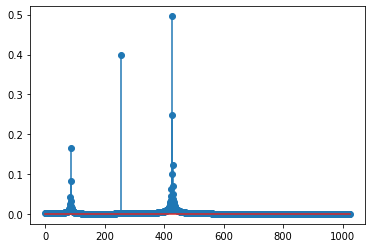

In [22]:
signal = [signal_function(n/fs) for n in range(N1)]
power = calc_power_spectral_density(signal)
plt.stem(power)
plt.show()

*Czy dla podanej liczby próbek mamy do czynienia ze zjawiskiem przecieku widma?*

Tak, moc rozlewa się na inne częstotliwości.

fs/NWD(f1,f2,f3) = 48000/2000 = 24

2048 nie jest podzielne przez 24, więc występuje przeciek

*Czy sytuacja uległaby zmianie dla liczby próbek N2 = 3/2 * N1?*

Tak, 3/2*N1 = 3072 jest podzielne przez 24, więc przeciek nie występuje.

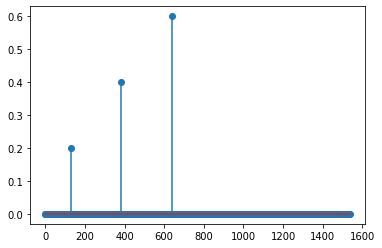

In [23]:
N2 = int(3/2*N1)

signal = [signal_function(n/fs) for n in range(N2)]
power = calc_power_spectral_density(signal)
plt.stem(power)
plt.show()